In [5]:
import os
print(os.getcwd())


f:\pipe5\Documents\Machine Learning\Proyecto ML\notebooks


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [12]:
df = pd.read_parquet("../artifacts/train_merged.parquet")
df.shape
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,INST_DAYS_ENTRY_PAYMENT_MIN,INST_DAYS_ENTRY_PAYMENT_COUNT,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_MAX,INST_AMT_INSTALMENT_MIN,INST_AMT_INSTALMENT_COUNT,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_MIN,INST_AMT_PAYMENT_COUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-587.0,19.0,11559.247105,53093.745,9251.775,19.0,11559.247105,53093.745,9251.775,19.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-2324.0,25.0,64754.586000,560835.360,6662.970,25.0,64754.586000,560835.360,6662.970,25.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-795.0,3.0,7096.155000,10573.965,5357.250,3.0,7096.155000,10573.965,5357.250,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-575.0,16.0,62947.088438,691786.890,2482.920,16.0,62947.088438,691786.890,2482.920,16.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-2318.0,66.0,12666.444545,22678.785,1821.780,66.0,12214.060227,22678.785,0.180,66.0


In [13]:
with open("../artifacts/model_features.txt", "r") as f:
    features = [line.strip() for line in f if line.strip()]

len(features), features[:10]


(481,
 ['SK_ID_CURR',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION'])

In [15]:
X = df[features].copy()
y = df["TARGET"]
X.head()


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,INST_DAYS_ENTRY_PAYMENT_MIN,INST_DAYS_ENTRY_PAYMENT_COUNT,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_MAX,INST_AMT_INSTALMENT_MIN,INST_AMT_INSTALMENT_COUNT,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_MIN,INST_AMT_PAYMENT_COUNT
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,-587.0,19.0,11559.247105,53093.745,9251.775,19.0,11559.247105,53093.745,9251.775,19.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,-2324.0,25.0,64754.586000,560835.360,6662.970,25.0,64754.586000,560835.360,6662.970,25.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,-795.0,3.0,7096.155000,10573.965,5357.250,3.0,7096.155000,10573.965,5357.250,3.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,-575.0,16.0,62947.088438,691786.890,2482.920,16.0,62947.088438,691786.890,2482.920,16.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,-2318.0,66.0,12666.444545,22678.785,1821.780,66.0,12214.060227,22678.785,0.180,66.0


In [16]:
X = X.fillna(0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(307511, 481)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_parquet("../artifacts/train_merged.parquet")

with open("../artifacts/model_features.txt", "r") as f:
    features = [line.strip() for line in f if line.strip()]

X = df[features].copy()
y = df["TARGET"]
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) PCA
pca = PCA(n_components=None, random_state=42)
X_pca = pca.fit_transform(X_scaled)


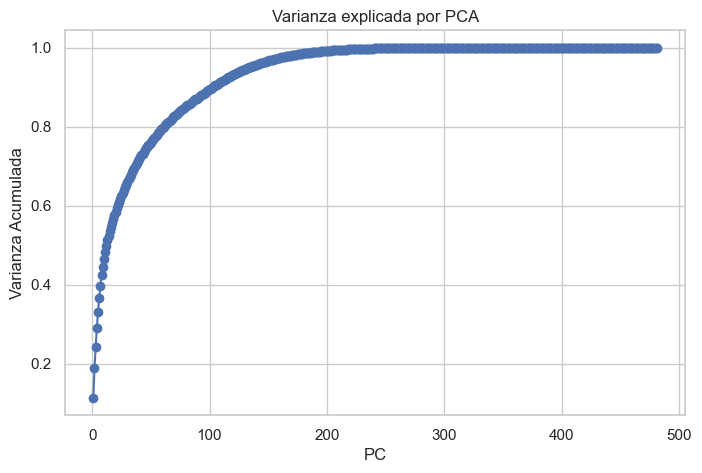

In [21]:
import matplotlib.pyplot as plt
import numpy as np

explained = pca.explained_variance_ratio_
cum_exp = np.cumsum(explained)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), cum_exp, marker='o')
plt.xlabel("PC")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.show()


In [23]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,INST_DAYS_ENTRY_PAYMENT_MIN,INST_DAYS_ENTRY_PAYMENT_COUNT,INST_AMT_INSTALMENT_MEAN,INST_AMT_INSTALMENT_MAX,INST_AMT_INSTALMENT_MIN,INST_AMT_INSTALMENT_COUNT,INST_AMT_PAYMENT_MEAN,INST_AMT_PAYMENT_MAX,INST_AMT_PAYMENT_MIN,INST_AMT_PAYMENT_COUNT
PC1,0.007217,-0.001324,0.006519,0.009608,0.008289,0.008854,0.003488,-0.015765,-0.000474,-0.004397,...,-0.077539,0.114460,0.011079,0.055583,-0.025470,0.114468,0.011121,0.055610,-0.022898,0.114460
PC2,0.008484,0.002976,0.006201,0.006920,0.010783,0.008270,-0.006880,-0.009028,0.002112,0.001320,...,-0.001209,-0.050487,0.012660,-0.003507,0.015688,-0.050510,0.012675,-0.003489,0.011514,-0.050487
PC3,0.019812,0.003561,-0.012317,-0.023063,-0.021446,-0.023181,-0.032473,-0.009089,0.014375,0.000759,...,-0.046000,0.012239,0.034976,0.031510,0.014738,0.012219,0.034414,0.031796,0.006094,0.012239
PC4,0.010351,-0.007039,0.009353,0.009101,0.010020,0.010327,0.033748,-0.011910,0.007487,-0.011717,...,-0.028765,0.008455,0.043492,0.035175,0.021647,0.008437,0.043448,0.035577,0.014357,0.008455
PC5,0.009101,-0.002593,0.001973,-0.005844,0.027119,-0.006176,0.009644,0.007805,0.001680,0.001395,...,0.014253,-0.006764,0.031749,0.015930,0.020607,-0.006776,0.031247,0.016208,0.016665,-0.006764


In [24]:
loadings.loc["PC1"].abs().sort_values(ascending=False).head(10)

INST_NUM_INSTALMENT_VERSION_COUNT      0.114468
INST_SK_ID_PREV_COUNT                  0.114468
INST_DAYS_INSTALMENT_COUNT             0.114468
INST_NUM_INSTALMENT_NUMBER_COUNT       0.114468
INST_SK_ID_CURR_COUNT                  0.114468
INST_AMT_INSTALMENT_COUNT              0.114468
INST_AMT_PAYMENT_COUNT                 0.114460
INST_DAYS_ENTRY_PAYMENT_COUNT          0.114460
CCB_MONTHS_BALANCE_MEAN                0.098183
CCB_CNT_INSTALMENT_MATURE_CUM_COUNT    0.098169
Name: PC1, dtype: float64

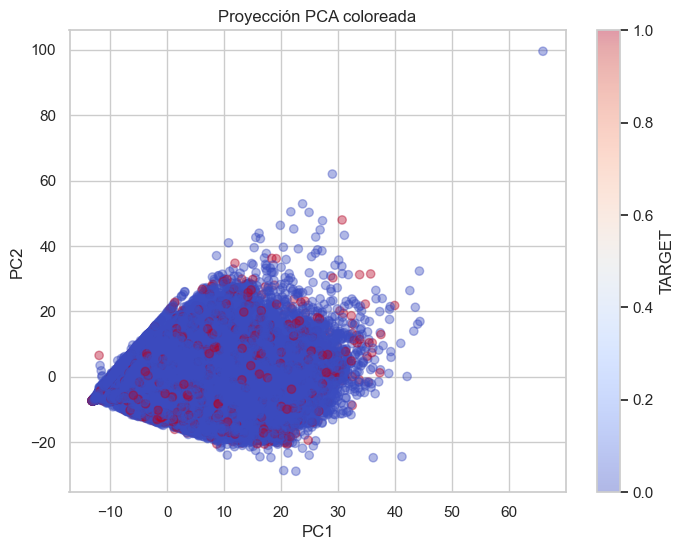

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA coloreada")
plt.colorbar(label='TARGET')
plt.show()

Interpretación de la varianza PCA:

El analasis muestra que el dataset presenta una muy alta dimensionalidad y que la varianza está distribuida entre varias cientos de variables. Ninguna componente principal captura por si sola una parte significativa de la información. Para poder explicar el 80%-90% de la varianza se requieren más de 50-150 componentes, por lo cual PCA no logro una reducción dimensional efectiva sin pérdida considerable de la información.

Interpretación del componente principal 1 (PC1):

Las variables con mayor carga en PC1 orresponden principalmente a indicadores derivados del comportamiento histórico de pagos (installments_payments, POS_CASH, credit_card_balance). Esto revela que PC1 hace un resumen de la frecuencia, antigüedad y número de transacciones crediticias realizadas por el cliente. En consecuencia, la mayor fuente de variabilidad del dataset proviene del comportamiento crediticio previo, más que de una característica demográfica.

Proyección PCA:

La visualización no muestra una separación clara entre clientes morosos (TARGET=1) y no morosos (TARGET=0). Ambos grupos se encuentran ampliamente mezclados, indicando que las primeras componentes principales no capturan de manera lineal patrones que discriminen el riesgo crediticio.